## Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("NCIProject_eligible_Apr19.csv")

### General Pre-Processing

In [4]:
'''
1. Separating Zipcode specific cancer data from original dataset.
2. Dropping null values.
3. Dropping duplicate rows based on zipcode.
'''

Cancers = ["Zipcode", "Breast", "ColoRectal", "Lung", "Lymph", "Prostate", "Urinary"]
cancersdf = df[Cancers]
print("Zipcode-Cancer data shape before removing missing values:", cancersdf.shape)
cancersdf = cancersdf.dropna()
print("Data shape after removing NaNs:", cancersdf.shape)

'''
Dropping Duplicates (Based on Zipcode) from Zipcode-Cancer data
'''
cancersdf = cancersdf.drop_duplicates(["Zipcode"])
print("Data shape after removing Duplicates:", cancersdf.shape)
cancersdf = cancersdf.set_index("Zipcode")
cancersdf.head()

Zipcode-Cancer data shape before removing missing values: (10846, 7)
Data shape after removing NaNs: (7247, 7)
Data shape after removing Duplicates: (279, 7)


,Breast,ColoRectal,Lung,Lymph,Prostate,Urinary
Zipcode,,,,,,
14512,32.0,21.0,50.0,8.0,40.0,16.0
14482,24.0,18.0,21.0,5.0,11.0,6.0
14564,54.0,16.0,38.0,13.0,50.0,14.0
14414,136.0,69.0,102.0,42.0,152.0,38.0
14424,200.0,102.0,205.0,63.0,202.0,76.0


In [5]:
'''
Separating Patients Data from original dataset.
'''
#Drop cancer incidence columns
patientsdf = df.drop(["Breast", "ColoRectal", "Lung", "Lymph", "Prostate",
                     "Urinary"], axis=1)
#Rename column
patientsdf = patientsdf.rename(columns={"CensusTract":"Census Tract"})

#Cleaning zip code data
patientsdf["Zipcode"] = patientsdf["Zipcode"].str[:5]


In [6]:
'''
Cleaning Patient Dataset:
1. 
2. Analyzing values for categorical attributes.
3. Dealing with missing values.
4. Dealing with duplicate rows.
'''

#Looking at Gender data
print("Values for Gender: ", patientsdf["Gender"].unique())
print("Number of rows with missing values for Gender", patientsdf[patientsdf["Gender"].isna()==True].shape)
patientsdf = patientsdf[patientsdf["Gender"].isna()==False]
patientsdf = patientsdf[patientsdf["Gender"]!="5"]
print("Data shape after removing erroneous and missing values for Gender:",patientsdf.shape)

print("\n")

#Looking at Race data
print("Values for Race:", patientsdf["Race/Ethnicity"].unique())
patientsdf = patientsdf.replace(to_replace=["Unk "],value="Unk")

#How should we handle other missing values for other variables? Remove them?
print("Shape of data that contains missing values for Addresses: ", patientsdf[patientsdf["Address"].isna()==True].shape)
print("Shape of data that contains missing values for City: ", patientsdf[patientsdf["City"].isna()==True].shape)
print("Shape of data that contains missing values for Zipcode: ", patientsdf[patientsdf["Zipcode"].isna()==True].shape)
print("Shape of data that contains missing values for PrimarySiteTitle: ", patientsdf[patientsdf["PrimarySiteTitle"].isna()==True].shape)
print("Shape of data that contains missing values for Cancer Diagnosis: ", patientsdf[patientsdf["Cancer Diagnosis (ICD-10)"].isna()==True].shape)
print("Shape of data that contains missing values for Stage: ", patientsdf[patientsdf["Stage"].isna()==True].shape)
print("Shape of data that contains missing values for Last Site Visited: ", patientsdf[patientsdf["Last Site Visited"].isna()==True].shape)
print("Shape of data that contains missing values for Tobacco Use: ", patientsdf[patientsdf["Tobacco Use"].isna()==True].shape)

#look at number of unique MRN's
print("Number of unique MRN's: ", patientsdf['MRN'].nunique())

#Dropping duplicates
print("Shape before removing duplicates", patientsdf.shape)


#we can drop these columns as they don't contribute much to analyses
patientsdf = patientsdf.drop(columns=['PrimarySiteTitle', 'Last Site Visited'])
patientsdf = patientsdf.drop_duplicates()
print("Shape after removing duplicates", patientsdf.shape)

#Filling missing values for tobacco use
patientsdf =  patientsdf.fillna({"Tobacco Use":"Unknown"})

#Filling missing values for Stage
patientsdf =  patientsdf.fillna({"Stage":"Unknown"})

#Filling missing values for Cancer Diagnosis
patientsdf =  patientsdf.fillna({"Cancer Diagnosis":"Unknown"})

#Filling missing values for Address/city/zipcode
patientsdf =  patientsdf.fillna({"Address":"Unknown"})
patientsdf =  patientsdf.fillna({"City":"Unknown"})
patientsdf =  patientsdf.fillna({"Zipcode":"Unknown"})

#patientsdf.head()

Values for Gender:  ['Male' 'Female']
Number of rows with missing values for Gender (0, 16)
Data shape after removing erroneous and missing values for Gender: (10846, 16)


Values for Race: ['White or Caucasian' 'African American'
 'American Indian or Alaskan Native' 'Other' 'Asian' 'Unk ' 'Unk'
 'Native Hawaiian or Other Pacific Islander'
 'American Indian or Alaska Native']
Shape of data that contains missing values for Addresses:  (0, 16)
Shape of data that contains missing values for City:  (0, 16)
Shape of data that contains missing values for Zipcode:  (0, 16)
Shape of data that contains missing values for PrimarySiteTitle:  (305, 16)
Shape of data that contains missing values for Cancer Diagnosis:  (0, 16)
Shape of data that contains missing values for Stage:  (3980, 16)
Shape of data that contains missing values for Last Site Visited:  (0, 16)
Shape of data that contains missing values for Tobacco Use:  (26, 16)
Number of unique MRN's:  8656
Shape before removing duplicates (10

In [7]:
'''
Function that discretizes stage column to [0,1,2,3,4]
'''
print("Stage values before discretization:")
print(patientsdf["Stage"].unique())

def discretize(dataframe, index):
    strlist = list(dataframe.loc[index,"Stage"])
    
    if(strlist[0]=="I" and len(strlist)==1):
        dataframe.loc[index,"Stage"]="1"
        
    elif(strlist[0]!="I" and len(strlist)>=2):
        if strlist[1]=="1":
            dataframe.loc[index,"Stage"]="1"
        elif strlist[1]=="2":
            dataframe.loc[index,"Stage"]="2" 
        elif strlist[1]=="3":
            dataframe.loc[index,"Stage"]="3"
        elif strlist[1]=="4":
            dataframe.loc[index,"Stage"]="4"
        elif strlist[1]=="0":
            dataframe.loc[index,"Stage"]="0"

    elif(strlist[0]=="I"):
        if(len(strlist)==2):
            if strlist[1]=="I":
                dataframe.loc[index,"Stage"]="2"
            elif strlist[1]=="V":
                dataframe.loc[index,"Stage"]="4"
            else:
                dataframe.loc[index,"Stage"]="1"
        elif(len(strlist)>2):
            if strlist[1]=="V":
                dataframe.loc[index,"Stage"]="4"
            elif strlist[1]=="I" and strlist[2]=="I":
                dataframe.loc[index,"Stage"]="3"
            elif strlist[1]=="I":
                dataframe.loc[index,"Stage"]="2" 
                
    str1 = str(dataframe.loc[index,"Stage"])
    if(str1=="Extensive"):
        dataframe.loc[index,"Stage"]="4"
    elif(str1=="pNA" or str1 == "pUNK"):
        dataframe.loc[index,"Stage"]="Unknown"

        
#Discretizing
for index,row in patientsdf.iterrows():
    discretize(patientsdf,index)

print("Stage values after discretization:")
print(patientsdf["Stage"].unique())


Stage values before discretization:
['c1E' 'Unknown' 'c2C' 'pNA' 'c4B' 'c3' 'c1B' 'p4B' 'p2A' 'c1' 'p0' 'p1A'
 'c0' 'p4C' 'c1A' 'c2A' 'p2B' 'p2C' 'p3' 'c2B' 'c4' 'pUNK' 'c2' 'c4A' '3'
 'p1B' 'p1A3' 'c1A3' 'p1' 'p1C' 'p1A2' 'p4' 'c3B' 'p3B' 'p3C1' 'c3A'
 'IIIA' 'p2' 'IVB' 'IV' 'p3C' 'II' 'IIA' 'c0a' 'IIIB' 'IVA' 'p3A' '4'
 'c3C' 'p1A1' 'c2E' 'p4A' 'c1A2' '0' '2' 'IIIC' '1' 'IIC' 'IB' 'p0a' 'I'
 'III' 'c4A2' 'p3D' 'IIB' 'p1B1' 'IVC' 'IA' 'c1A1' 'c3A2' 'p3A1' 'c1B1'
 'c4C' 'p3C2' 'p1E' 'Limited' 'p3A2' 'IE' 'c2A1' 'c3C1']
Stage values after discretization:
['1' 'Unknown' '2' '4' '3' '0' 'Limited']


In [8]:
'''
ICD10 Mapping: ICD-10 Codes -> General Cancer Descriptions 
'''

ICD10 = pd.read_csv("ICD10map.csv")
ICD10 = ICD10.drop(columns="Notes")
ICD10.head()

ICD10_Description = dict()

#Making a dictionary for ICD10-Cancer Description
for index,row in ICD10.iterrows():
    key = str(row[0]).strip()
    val = row[1]
    ICD10_Description[key]=val
    
display("Map: ",ICD10_Description)


'Map: '

{'C00': 'Head and neck cancer',
 'C01': 'Head and neck cancer',
 'C02': 'Head and neck cancer',
 'C03': 'Head and neck cancer',
 'C04': 'Head and neck cancer',
 'C05': 'Head and neck cancer',
 'C06': 'Head and neck cancer',
 'C07': 'Head and neck cancer',
 'C08': 'Head and neck cancer',
 'C09': 'Head and neck cancer',
 'C10': 'Head and neck cancer',
 'C11': 'Head and neck cancer',
 'C12': 'Head and neck cancer',
 'C13': 'Head and neck cancer',
 'C14': 'Head and neck cancer',
 'C15': 'Esophageal cancer',
 'C16': 'Gastric cancer',
 'C17': 'Small bowel cancer',
 'C18': 'Colorectal cancer',
 'C19': 'Colorectal cancer',
 'C20': 'Colorectal cancer',
 'C21': 'Anal cancer',
 'C22': 'Liver cancer',
 'C23': 'Cholangiocarcinoma',
 'C24': 'Cholangiocarcinoma',
 'C25': 'Pancreatic cancer',
 'C26': 'Other abdominal cancer',
 'C30': 'Head and neck cancer',
 'C31': 'Head and neck cancer',
 'C32': 'Head and neck cancer',
 'C33': 'Head and neck cancer',
 'C34': 'Lung cancer',
 'C37': 'Thymus cancer',
 '

In [10]:
'''
Adding Cancer Description as a column.
Mapping ICD-10 Codes
'''
for index,row in patientsdf.iterrows():
    code = str(row["Cancer Diagnosis (ICD-10)"])
    patientsdf.loc[index, "Cancer Diagnosis (ICD-10)"] = code[0:3]
    patientsdf.loc[index, "Cancer Description"] = ICD10_Description.get(code[0:3])
    
#Replacing missing values
patientsdf =  patientsdf.fillna({"Cancer Description":"Unknown"})


In [11]:
'''
Removing all duplicate MRN values
Note: we still have about 360 duplicate MRN's. 
'''
print("Number of unique MRN's: ", patientsdf['MRN'].nunique())
print("Shape before removing duplicates", patientsdf.shape)
patientsdf = patientsdf.drop_duplicates()
print("Shape after removing duplicates", patientsdf.shape)


#~350 duplicated MRN's on first pass
#export to .csv file for manual checks, then re-upload cleaned dataset
dupMRN = patientsdf[patientsdf.duplicated(["MRN"], keep=False)]
dupMRN.to_csv('DuplicateMRN.csv')
#After first pass, remaining cases are people with ≥1 cancer diagnosis

Number of unique MRN's:  8656
Shape before removing duplicates (9145, 15)
Shape after removing duplicates (9024, 15)


In [12]:
'''
Processing census tract data and joining RUCA codes:
1. Converting to standard 6 digits
2. Joining with RUCA code dataset
'''
patientsdf =  patientsdf.fillna({"Census Tract":"999999", "County":"999"})
patientsdf["Census Tract"] = patientsdf["Census Tract"].astype(int).astype(str)
patientsdf["County"] = patientsdf["County"].astype(int).astype(str)
patientsdf["Census Tract"] = patientsdf["Census Tract"].apply(lambda x: x.zfill(6))
patientsdf["County"] = patientsdf["County"].apply(lambda x: x.zfill(3))
patientsdf["FIPS"] = patientsdf["County"] + patientsdf["Census Tract"]

rucadf = pd.read_csv("RUCANY2010.csv")
rucadf = rucadf[rucadf.columns[2:]]
rucadf.columns = ["County", "FIPS", "RUCA", "Secondary RUCA", "Population", "Land Area (sq. mi.)", 
                  "Pop. Density"]
rucadf["FIPS"] = rucadf["FIPS"].astype(int).astype(str)
rucadf["FIPS"] = rucadf["FIPS"].str[2:]

ptsdf = pd.merge(patientsdf, rucadf[["FIPS", "RUCA"]], on = "FIPS", how="left")
ptsdf.to_csv('Patient_withRUCA.csv')



## Data Visualization

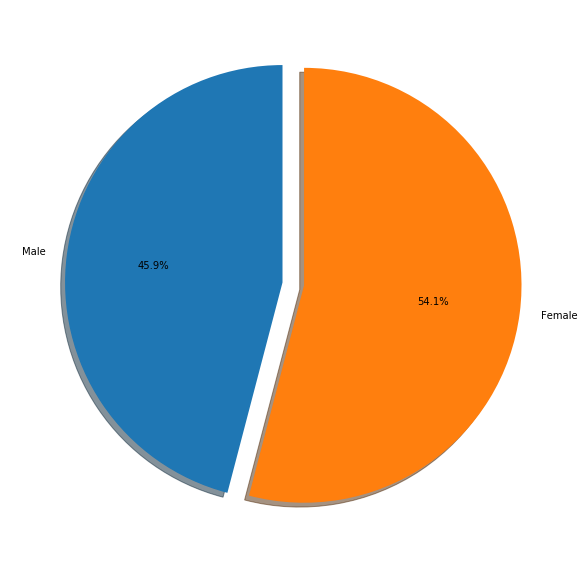

In [13]:
'''
Gender data distribution
'''

sizes = [patientsdf[patientsdf["Gender"]=="Male"].shape[0], patientsdf[patientsdf["Gender"]=="Female"].shape[0]]
labels = "Male", "Female"
explode = (0,0.1)
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

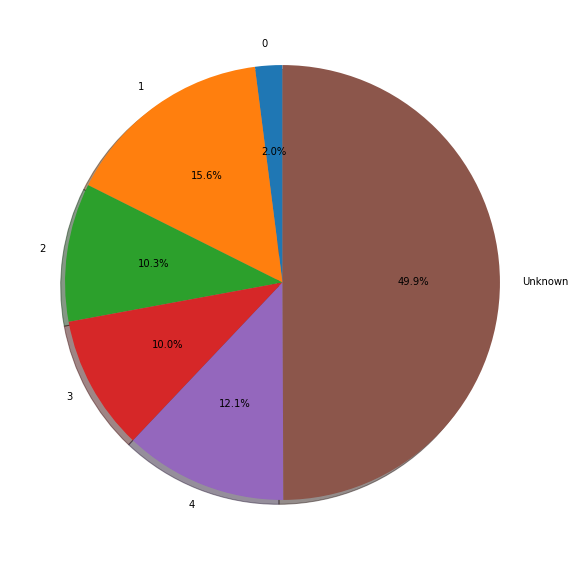

In [14]:
'''
Stage data distribution
'''

sizes = []
labels = ["0","1","2","3","4","Unknown"]
for stage in labels:
    sizes.append(patientsdf[patientsdf["Stage"]==stage].shape[0])
    
explode = (0,0,0,0,0,0)
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

[8695, 130, 61, 16, 35, 2]


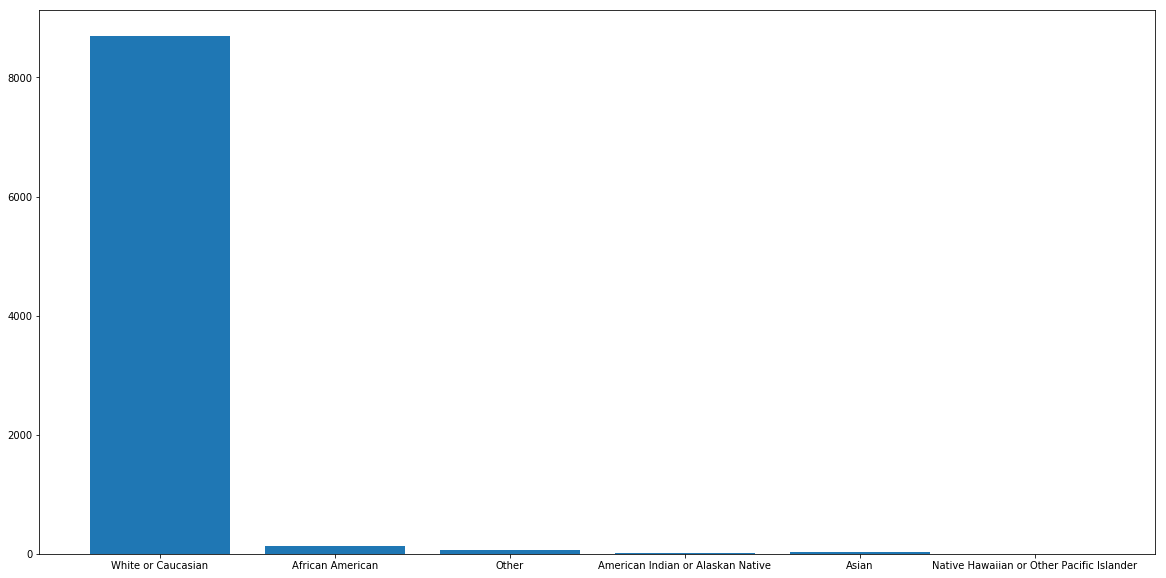

In [16]:
'''
Race Data distribution
'''

sizes = []
labels = ['White or Caucasian', 'African American','Other',
          'American Indian or Alaskan Native', 'Asian',
          'Native Hawaiian or Other Pacific Islander']
for race in labels:
    sizes.append(patientsdf[patientsdf["Race/Ethnicity"]==race].shape[0])
print(sizes)

plt.figure(figsize=(20,10))
plt.bar(labels,sizes)
plt.show()

[5069, 3699, 93, 163]


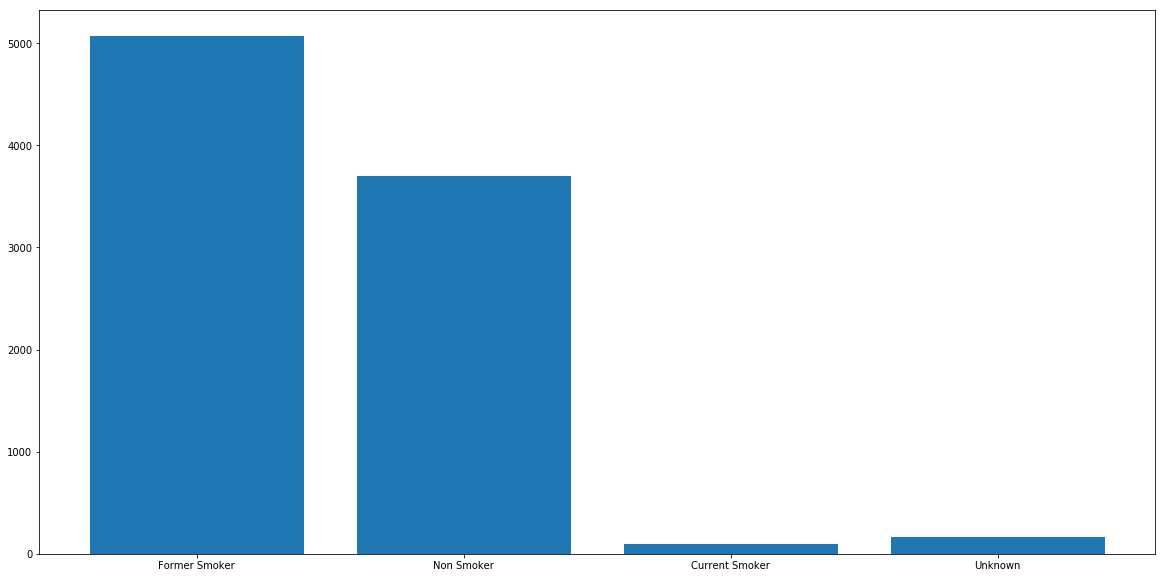

In [17]:
'''
Tobacco Use Data distributuion.
'''

#collapse into 4 categories
patientsdf["Tobacco Use"] = patientsdf["Tobacco Use"].replace('Never Smoker', 'Non Smoker')
patientsdf["Tobacco Use"] = patientsdf["Tobacco Use"].replace('Current Every Day Smoker', 'Current Smoker')
patientsdf["Tobacco Use"] = patientsdf["Tobacco Use"].replace('Current Some Day Smoker', 'Current Smoker')
sizes = []
labels = ['Former Smoker', 'Non Smoker', 'Current Smoker',
          'Unknown',]
for smoke in labels:
    sizes.append(patientsdf[patientsdf["Tobacco Use"]==smoke].shape[0])
print(sizes)
plt.figure(figsize=(20,10))
plt.bar(labels,sizes)
plt.show()

Median age is:  68.0
Mean age is:  66.65436613475177
Minumum age is:  18 and maximum age is:  101


Text(0, 0.5, 'Number of people')

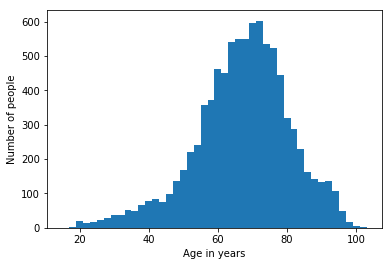

In [18]:
'''
Looking at age distribution
'''

print("Median age is: ", patientsdf.Age.median())
print("Mean age is: ", patientsdf.Age.mean())
print("Minumum age is: ", patientsdf.Age.min(), 
      "and maximum age is: ", patientsdf.Age.max())
bins = [*range(15, 105, 2)] 
plt.hist(patientsdf.Age, bins=bins)
plt.xlabel("Age in years")
plt.ylabel("Number of people")

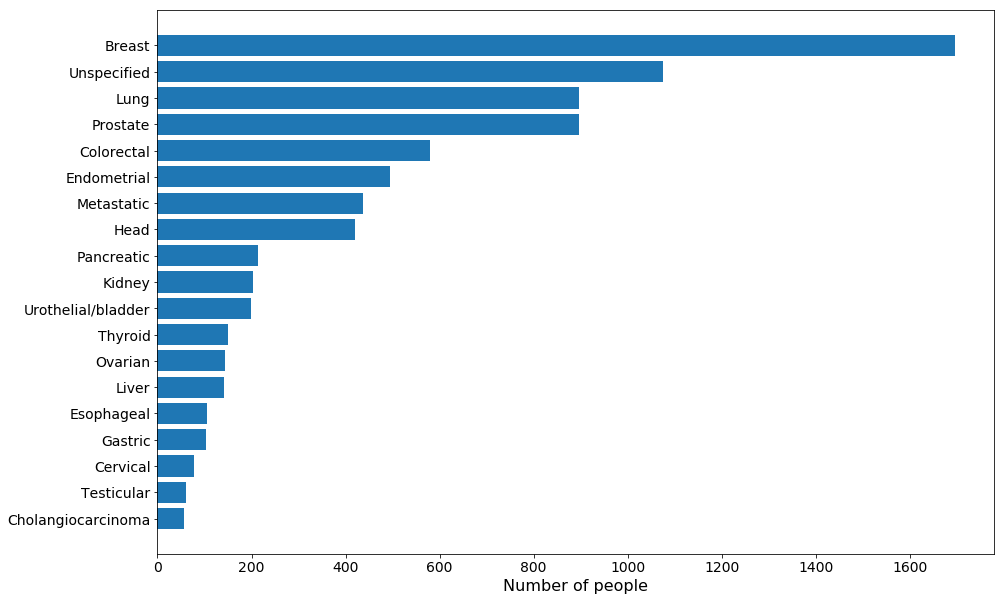

In [19]:
'''
Cancer description data distribution
'''

dxlist = patientsdf["Cancer Description"].unique()
moddxlist = ['Prostate cancer', 'Lung cancer', 'Gastric cancer',
       'Breast cancer', 'Metastatic cancer', 
       'Esophageal cancer', 'Urothelial/bladder cancer',
       'Colorectal cancer', 'Head and neck cancer', 
       'Unspecified cancer', 'Endometrial cancer', 'Thyroid cancer', 'Kidney cancer',
       'Ovarian cancer', 'Pancreatic cancer',
       'Liver cancer', 'Cholangiocarcinoma', 'Testicular cancer', 'Cervical cancer']

modptsdf = patientsdf[patientsdf["Cancer Description"].isin(moddxlist)]
cancertypesdf = modptsdf["Cancer Description"].value_counts().sort_values(ascending=True).rename_axis('Cancer Type').reset_index(name='counts')
cancertypesdf['Cancer Type'] = cancertypesdf['Cancer Type'].astype(str)
cancertypesdf.head()

cancertypesdf['Cancer'] = cancertypesdf['Cancer Type'].str.split(' ').str[0]
cancertypesdf.head()

plt.figure(figsize=(15,10))
plt.barh(width=cancertypesdf.counts, y=cancertypesdf.Cancer)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of people", fontsize=16)
plt.show()

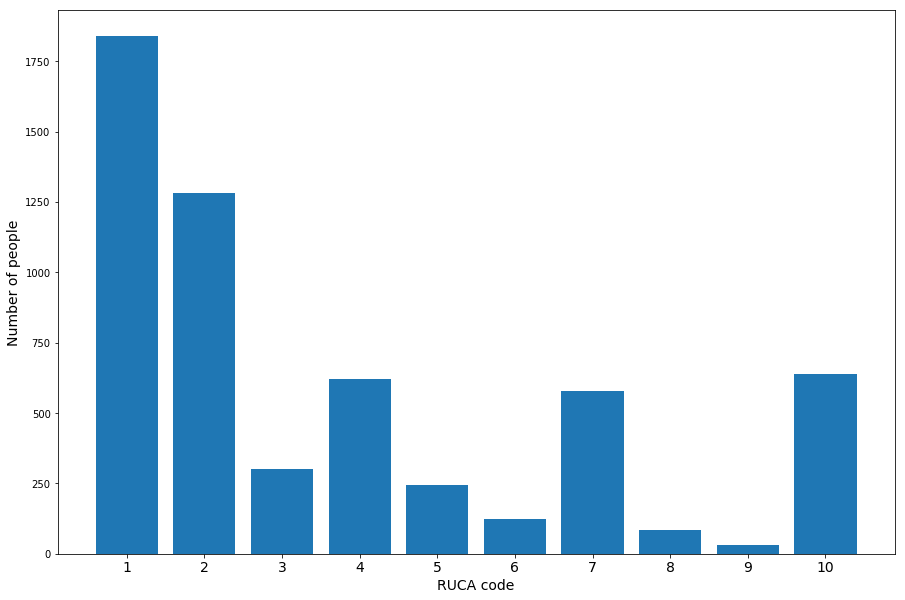

In [20]:
'''
Looking at Geographic Distribution using RUCA codes
'''

geodf = ptsdf['RUCA'].value_counts().rename_axis('RUCA').reset_index(name='counts')
geodf.head()

plt.figure(figsize=(15,10))
plt.bar(x=geodf.RUCA, height=geodf.counts)
plt.xticks(geodf.RUCA, fontsize=14 )
plt.ylabel("Number of people", fontsize=14)
plt.xlabel("RUCA code", fontsize=14)
plt.show()

In [21]:
patientsdf.to_csv('PatientData.csv')
cancersdf.to_csv('CancerData.csv')

### Market Share Analysis

In [22]:
'''
Observed versus Expected Cases Based on Market Share
'''

#subset out data by diagnosis
breastdf = patientsdf[patientsdf["Cancer Description"]=='Breast cancer']
colorectaldf = patientsdf[patientsdf["Cancer Description"]=='Colorectal cancer']
lungdf = patientsdf[patientsdf["Cancer Description"]=='Lung cancer']
prostatedf = patientsdf[patientsdf["Cancer Description"]=='Prostate cancer']
urodf = patientsdf[patientsdf["Cancer Description"].isin(['Urothelial/bladder cancer', 
                                                         'Kidney cancer'])]

#aggregate by zipcode
breastbyzip = breastdf.groupby("Zipcode").agg('count')
crcbyzip = colorectaldf.groupby("Zipcode").agg('count')
lungbyzip = lungdf.groupby("Zipcode").agg('count')
prostatebyzip = prostatedf.groupby("Zipcode").agg('count')
urobyzip = urodf.groupby("Zipcode").agg('count')


#Multiply cancersdf values by 2 to get 2-year raw incidence
cancers2df = cancersdf.apply(lambda x: x*2)
#Drop out lymphoma - we aren't looking at this diagnosis
cancers2df = cancers2df.drop(columns = ["Lymph"])
#Rename columns - these are raw incidence numbers for each zipcode
cancers2df = cancers2df.rename(columns = {'Breast' : 'Breast Incidence', 'ColoRectal' : 
                'Colorectal Incidence', 'Lung' : 'Lung Incidence', 'Prostate': 'Prostate Incidence',
                'Urinary' : 'Urinary Incidence'})


#Create a table for incidence versus cases 
mktsharedf = pd.merge(cancers2df, breastbyzip[["MRN"]], left_index = True, right_index = True, how="left")
mktsharedf = mktsharedf.rename(columns = {'MRN' : 'Breast Cases'})
mktsharedf = pd.merge(mktsharedf, crcbyzip[["MRN"]], left_index = True, right_index = True, how="left")
mktsharedf = mktsharedf.rename(columns = {'MRN' : 'Colorectal Cases'})
mktsharedf = pd.merge(mktsharedf, lungbyzip[["MRN"]], left_index = True, right_index = True, how="left")
mktsharedf = mktsharedf.rename(columns = {'MRN' : 'Lung Cases'})
mktsharedf = pd.merge(mktsharedf, prostatebyzip[["MRN"]], left_index = True, right_index = True, how="left")
mktsharedf = mktsharedf.rename(columns = {'MRN' : 'Prostate Cases'})
mktsharedf = pd.merge(mktsharedf, urobyzip[["MRN"]], left_index = True, right_index = True, how="left")
mktsharedf = mktsharedf.rename(columns = {'MRN' : 'Urinary Cases'})

#Calculate market share
mktsharedf["Breast Share"] = mktsharedf["Breast Cases"] / mktsharedf["Breast Incidence"]
mktsharedf["CRC Share"] = mktsharedf["Colorectal Cases"] / mktsharedf["Colorectal Incidence"]
mktsharedf["Lung Share"] = mktsharedf["Lung Cases"] / mktsharedf["Lung Incidence"]
mktsharedf["Prostate Share"] = mktsharedf["Prostate Cases"] / mktsharedf["Prostate Incidence"]
mktsharedf["Urinary Share"] = mktsharedf["Urinary Cases"] / mktsharedf["Urinary Incidence"]


mktsharedf.to_csv('MarketShare.csv')
mktsharedf.head()


,Breast Incidence,Colorectal Incidence,Lung Incidence,Prostate Incidence,Urinary Incidence,Breast Cases,Colorectal Cases,Lung Cases,Prostate Cases,Urinary Cases,Breast Share,CRC Share,Lung Share,Prostate Share,Urinary Share
Zipcode,,,,,,,,,,,,,,,
14512,64.0,42.0,100.0,80.0,32.0,32.0,8.0,11.0,14.0,4.0,0.500000,0.190476,0.110000,0.175000,0.125000
14482,48.0,36.0,42.0,22.0,12.0,30.0,3.0,15.0,15.0,2.0,0.625000,0.083333,0.357143,0.681818,0.166667
14564,108.0,32.0,76.0,100.0,28.0,76.0,6.0,21.0,35.0,17.0,0.703704,0.187500,0.276316,0.350000,0.607143
14414,272.0,138.0,204.0,304.0,76.0,34.0,10.0,19.0,20.0,11.0,0.125000,0.072464,0.093137,0.065789,0.144737
14424,400.0,204.0,410.0,404.0,152.0,165.0,31.0,54.0,90.0,32.0,0.412500,0.151961,0.131707,0.222772,0.210526
